In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## 일단 기사 100개만 넣어서 LDA 모델만들고 Topic modeling

In [163]:
import pandas as pd
file_path = '수도권_아파트_청약_뉴스_크롤링.csv'
df = pd.read_csv(file_path)
df

,title,content,url,apartment
0,“7인 가구에 무주택 15년 이상”…새해 첫 만점통장 ‘이곳’서 나왔다,의왕 월암지구 대방 디에트르 레이크파크 조감도. [사진 출처 = 대방건설]경기도 의...,https://n.news.naver.com/mnews/article/009/000...,의왕 월암지구 대방 디에트르 레이크파크
1,올해 첫 청약 통장 만점 나온 단지는…서울 아니고 이곳,'의왕 디에트르 레이크파크'서 84점 나와[서울경제]의왕 월암 디에트르 레이크파크 ...,https://n.news.naver.com/mnews/article/011/000...,의왕 월암지구 대방 디에트르 레이크파크
2,"""지금 아니면 내집마련 못한다?""...새해 첫 84점 만점통장 나왔다",아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점...,https://n.news.naver.com/mnews/article/014/000...,의왕 월암지구 대방 디에트르 레이크파크
3,강달러 간다는데 환율 더 오르나 [3분 브리프],[한 눈에 읽기]①금값 내년에도 고공행진 전망②1년새 121% 상승한 비트코인③머스...,https://n.news.naver.com/mnews/article/277/000...,의왕 월암지구 대방 디에트르 레이크파크
4,[1월 1주 분양동향] '검단신도시파밀리에엘리프' 등 5911가구 분양,일반분양 기준으론 5014가구⋯새해 맞아 견본주택 개관은 전무푸른 뱀의 해인 새해 ...,https://n.news.naver.com/mnews/article/031/000...,의왕 월암지구 대방 디에트르 레이크파크
...,...,...,...,...
6209,"인기 아파트 청약을 통해 살펴본 분양 트렌드, 타워형 경쟁률 낮고 가점...",코로나19 감염 확산이 장기화되면서 국내 경제 산업 전반에 ‘경고음’이 커지고 있다...,https://n.news.naver.com/mnews/article/009/000...,양주옥정유림노르웨이숲
6210,"SM그룹·양우건설, 첫 분양서 미달 `쓴맛`",수도권 분양경기 침체 영향아파트 브랜드 인지도 낮고코로나 여파에 홍보도 못해중견건설...,https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6211,“분양경기 최악인데”…마수걸이 분양 나섰다 된서리 맞은 ‘SM·양우건...,"올해 경기도 양주·파주서 첫 분양 나서 두 단지 모두 1순위 미달""SM그룹·양우건설...",https://n.news.naver.com/mnews/article/029/000...,양주옥정유림노르웨이숲
6212,코로나에도…`줍줍`열기는 뜨거웠다,양주 노르웨이숲 무순위 청약주말 아침부터 수백명 몰려14일 양주옥정 노르웨이숲 견본...,https://n.news.naver.com/mnews/article/009/000...,양주옥정유림노르웨이숲


In [94]:
train_df = df

In [187]:
train_df[11:21]

,title,content,url,apartment
11,강남 ‘通’ 이 지하철 노선 주변에 청약통장 31만개 몰려,서울 지하철 7호선 연장 노선도. [사진 출처 = 부동산인포]7호선 주요 분양 아파...,https://n.news.naver.com/mnews/article/009/000...,더샵 퍼스트월드
12,‘서울 7호선’ 따라 부동산 뜬다...청약통장 31만개 흡수,"수도권 평균 4배, 최근 1년간 1순위 경쟁률 76대1서울 지하철 7호선 연장 노선...",https://n.news.naver.com/mnews/article/243/000...,더샵 퍼스트월드
13,7호선 청약통장 31만개 흡수… ‘해링턴 스퀘어 산곡역’ 등 분양 앞둬,7호선 주요 분양 아파트가 완판 행진을 이어가며 수도권 청약 경쟁률을 이끄는 것으로...,https://n.news.naver.com/mnews/article/020/000...,더샵 퍼스트월드
14,7호선 ‘부의 라인’으로 부상…‘해링턴 스퀘어 산곡역’ 등 역세권 단...,"작년부터 청약통장 31만개 흡수, 수도권 평균의 ‘4배’강남·가산 등 정차해 선호도...",https://n.news.naver.com/mnews/article/050/000...,더샵 퍼스트월드
15,"""없었으면 어쩔뻔..."" 요새 뜨는 '골드라인' 아시나요",4165가구에 청약통장 31만건 이상 몰려...76대1 경쟁률[파이낸셜뉴스] 수도권...,https://n.news.naver.com/mnews/article/014/000...,더샵 퍼스트월드
16,서울 지하철 7호선 라인 청약 치열하네…통장 31만개 꽂혀,작년부터 올해까지 1순위 경쟁률 76대 1수도권 평균보다 4배 높아서울 지하철 7호...,https://n.news.naver.com/mnews/article/015/000...,더샵 퍼스트월드
17,서울 아파트에 무슨 일이?…미분양 폭증한 이유,1월 미분양 주택 1352가구…10년만 최대 규모중랑·성북구 고분양가 논란 단지서 ...,https://n.news.naver.com/mnews/article/018/000...,더샵 퍼스트월드
18,‘인천의 강남’ 송도…전문가들이 제언하는 투자 방법은?[집슐랭],[서울경제]인천 송도 부동산 시장이 한때 ‘송도 불패’라는 말이 무색하게 3년째 하...,https://n.news.naver.com/mnews/article/011/000...,더샵 퍼스트월드
19,송도 집값 비밀 A to Z…서울 부동산 규제에 롤러코스트[집슐랭],서울 부동산 규제하면 송도 아파트 가격 상승2022년 정점 찍고 3년째 하락세입주물...,https://n.news.naver.com/mnews/article/011/000...,더샵 퍼스트월드
20,송도 집값 폭등할때마다 공통적으로 나타난 현상은[집슐랭],서울 부동산 규제하면 송도 아파트 가격 상승2022년 정점 찍고 3년째 하락세입주물...,https://n.news.naver.com/mnews/article/011/000...,더샵 퍼스트월드


In [184]:
train_df['content'][11]

'서울 지하철 7호선 연장 노선도. [사진 출처 = 부동산인포]7호선 주요 분양 아파트가 ‘완판’ 행진을 이어가고 있다. 강남을 연결하는 핵심 노선인 점과 더불어 역 주변을 따라 지역을 대표하는 아파트들의 대규모 개발도 이어지고 있는 점이 긍정적인 요소로 작용했다는 평가다.12일 부동산인포 자료에 따르면 작년 1월부터 올해 2월까지 7호선 내 13개 단지가 분양에 나서 4165가구에 31만6579건의 청약이 몰린 것으로 나타났다. 1순위 평균 76.0대 1의 경쟁률로 이 기간 수도권 1순위 평균 18.8대 1을 4배가량 웃도는 수준이다.7호선은 서쪽에서는 인천과 부천, 그리고 북쪽에서는 중랑, 노원, 의정부 일대에서 강남을 가기에 용이하다. 7호선 양 끝으로 노선 연장도 진행 중이다.특히 7호선 라인에는 대규모 정비사업이 속속 진행되고 있다. 강남은 서초구 ‘래미안 원펜타스(527.3대 1)’, ‘메이플자이(442.3대 1)’, ‘래미안 원페를라(151.6대)’, ‘디에이치 방배(90.2대 1)’가 공급됐고, 강남구는 ‘청담 르엘(667.2대 1)’이 분양에 나서 치열한 경쟁률을 기록했다.지난해 하반기 청약 시장의 관심을 끈 노원구 ‘서울원 아이파크(14.9대 1)’, 중랑구 ‘더샵 퍼스트월드 서울(9.3대 1)’도 7호선 라인에 위치했다.경기도에서는 광명뉴타운에서 대규모 공급에 이어 ‘광명자이힐스테이트SK뷰(3.8대 1)’, 광명 롯데캐슬 시그니처(3.4대 1)‘가 100% 계약을 마쳤다.7호선 산곡역 약 150m 거리에는 ‘해링턴 스퀘어 산곡역’도 오는 4월 분양을 앞뒀다. 총 2475가구 대단지로 전용면적 39~96㎡ 총 1248가구가 일반분양 예정이다. 광명사거리역 역세권에서는 현대건설이 광명 11구역 재개발로 총 4200여 가구를 공급하며 600여 가구를 연내 일반분양 계획이다.이런 가운데 장승배기역 부근에서는 동작구 노량진 뉴타운으로 아파트 공급이 이어진다. 노량진2구역(SK에코플랜트 시공)과 6구역(GS건설∙SK에코플랜트 컨소시엄), 4구역(현대건

In [181]:
train_df['content'][2]

"아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점 통장이 올해 첫 등장했다. 84점을 받으려면 7인 가구 이상으로 무주택 기간 15년 이상을 유지해야 한다.11일 청약홈에 따르면 지난 8일 당첨자를 발표한 경기 의왕시 '의왕 월암지구 대방 디에트르 레이크파크'에서 84점 만점 통장이 나왔다.청약홈에 따르면 만점 통장은 전용 84㎡A 기타 지역에서 나왔다. 최저 47점, 최고 84점을 기록했다. 올해 만점 통장은 이번이 처음이다.이 단지는 앞서 진행된 1·2순위 청약에서 386가구 공급(특별공급 제외)에 1625명이 신청했다. 이 아파트는 분양가 상한제가 적용된 단지다.경기 의왕시 '의왕 월암 디에트르 레이크파크' 조감도. 대방건설 제공앞서 지난 3일 당첨자를 발표한 서울 중랑구 상봉동 '더샵 퍼스트월드'에서도 고가점 통장이 나왔다. 전용 39㎡A타입에서 최저 55점, 최고 81점을 보였다. 80점 이상을 받으려면 7인가구 이상 이어야 한다.청약홈에 따르면 지난해 만점(84점) 통장은 7개 단지에서 나왔다. 지난 2020년부터 가점제 당첨자 정보가 공개되고 있다. 통계 공개 이후 최대치이다.세부적으로 보면 서울 4개 단지, 경기 2개 단지, 전북 1개 단지 등이다. 서울에서는 ‘래미안 원베일리’, ‘래미안 원펜타스’, ‘디에이치 대치 에델루이’ 등 이른바 강남3구에 집중돼 있다. 분양가상한제가 적용되면서 로또 청약 단지에 고가점 통장이 몰린 것이다.특히 래미안 원펜타스에서는 3개 타입에서 3개의 만점 통장이 나오기도 했다. 지방에서는 전북의 '에코시티 더샵4차'가 유일하다.한편 올해 역시 이른바 로또 등 인기 물량이 크게 줄 것으로 예상되면서 고가점 통장 간의 경쟁도 치열할 것으로 전망되고 있다. 서울 강남 3구 로또 단지에 당첨되기 위해서는 70점대 후반은 돼야 안정권에 들 것으로 보인다."

In [153]:
with open('stopwords-ko.txt', 'r') as f:
  list_file = f.readlines() 
stopwords = [word[:-1] for word in list_file ]
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [166]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 형태소 분석기 설정
okt = Okt()

# 불용어 리스트 확장
stopwords.extend(['가가', '부동산', '단지', '순위', '청약', '아파트', '분양', '서울', '가구', '공급', '전용'])

# 1. 텍스트 정제 함수 (특수문자, 숫자 제거)
def clean_text(text):
    text = re.sub(r'\([^)]*\)', '', text)  # 괄호 안 내용 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백 제외 문자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 연속 공백 제거
    return text

# 2. 형태소 분석을 통한 명사 추출 함수
def extract_nouns(text):
    nouns = okt.morphs(text)  # 명사만 추출
    nouns = [word for word in nouns if word not in stopwords and len(word) > 1]  # 불용어 제거 및 한 글자 단어 제외
    return ' '.join(nouns)

# 3. 전체 데이터 전처리
corpus = train_df['content'][:1000].tolist()
cleaned_corpus = [extract_nouns(clean_text(text)) for text in corpus]  # 정제 + 명사 추출

# 4. 벡터화 (CountVectorizer 사용)
vectorizer = CountVectorizer(
    max_df=0.9,  # 전체 문서의 90% 이하에서 등장한 단어만 사용 (더 보편적인 단어 포함)
    min_df=1,    # 최소 1번 이상 등장한 단어 포함 (희소 단어도 반영)
    max_features=3000,
    # ngram_range=(1, 1),  # unigram + bigram + trigram 사용
    # token_pattern=r'\b\w+\b'  # 숫자 포함 단어도 추출 가능
)

dtm = vectorizer.fit_transform(cleaned_corpus)  # 전처리된 데이터로 DTM 생성
dtm.shape

(1000, 3000)

In [123]:
import re
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 뉴스 기사 데이터 예시
docs = train_df['content'][:100]

# 텍스트 전처리 함수
def preprocess_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # 대괄호 내 텍스트 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백 제외한 모든 문자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 다중 공백 제거
    return text

# 형태소 분석 및 토큰화
okt = Okt()

def tokenize(text):
    return okt.nouns(text)

# 전처리 및 토큰화 적용
docs_cleaned = [preprocess_text(doc) for doc in docs]
docs_tokenized = [" ".join(tokenize(doc)) for doc in docs_cleaned]

# 단어 빈도 분석 및 불용어 리스트 생성
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs_tokenized)
word_counts = np.asarray(X.sum(axis=0)).flatten()
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_counts})
word_freq = word_freq.sort_values(by='count', ascending=False)

# 상위 10개 단어를 불용어로 지정
common_words = set(word_freq.head(10)['word'])

# 불용어 리스트 출력
print("자동 생성된 불용어 리스트:", common_words)


자동 생성된 불용어 리스트: {'부동산', '단지', '순위', '청약', '아파트', '분양', '서울', '가구', '공급', '전용'}


In [126]:
import re
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 뉴스 기사 데이터 예시
docs = train_df['content'][:100]

# 텍스트 전처리 함수
def preprocess_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # 대괄호 내 텍스트 제거
    text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백 제외한 모든 문자 제거
    text = re.sub(r'\s+', ' ', text).strip()  # 다중 공백 제거
    return text

# 형태소 분석 및 토큰화
okt = Okt()

def tokenize(text):
    return okt.nouns(text)

# 전처리 및 토큰화 적용
docs_cleaned = [preprocess_text(doc) for doc in docs]
docs_tokenized = [" ".join(tokenize(doc)) for doc in docs_cleaned]

# TF-IDF 적용하여 단어별 중요도 계산
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(docs_tokenized)
feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 값이 가장 낮은 단어를 불용어로 선정
word_importance = np.asarray(X_tfidf.mean(axis=0)).flatten()
word_freq = pd.DataFrame({'word': feature_names, 'importance': word_importance})
word_freq = word_freq.sort_values(by='importance', ascending=False).reset_index(drop=True)

print(word_freq[:100])

# TF-IDF 중요도가 가장 낮은 상위 10개 단어를 불용어로 지정
domain_stopwords = set(word_freq.head(100)['word'])

# 사용자 지정 불용어 추가
# custom_stopwords = {'사진', '출처', '제공', '경기도', '서울경제', '연합뉴스'}
# domain_stopwords.update(custom_stopwords)

# 불용어 리스트 출력
print("도메인 특화 불용어 리스트:", domain_stopwords)


   word  importance
0    가구    0.088561
1    분양    0.086580
2    청약    0.066540
3    단지    0.066163
4    미분    0.056687
..  ...         ...
95   규제    0.016010
96   최근    0.015875
97   도보    0.015874
98   거래    0.015795
99   산업    0.015735

[100 rows x 2 columns]
도메인 특화 불용어 리스트: {'부동산', '상승', '블록', '곤지암', '경기', '도시', '당첨', '수도권', '통장', '덕소', '규제', '예정', '프라이', '대출', '접수', '공급', '송도역', '위치', '가격', '아이파크', '공원', '비율', '일원', '개발', '인근', '마감', '최근', '진행', '시작', '올해', '내년', '거래', '평택', '규모', '최고', '파크', '물량', '미분', '기록', '롯데', '브레인', '송도', '센트럴', '타입', '신도시', '계약', '전용', '관심', '단지', '경기도', '덕소역', '수요', '분양', '산업', '지난해', '청약', '일반', '면적', '시티', '가구', '조성', '세대', '퍼스트', '가장', '호선', '오피스텔', '창경궁', '특별', '도보', '경쟁률', '인천', '지구', '주택', '노선', '사업', '래미안', '리버', '구역', '지하', '계약금', '지역', '제공', '모집', '아파트', '서울', '건설', '시장', '지상', '뉴타운', '캐슬', '푸르지오', '순위', '전국', '평균', '이용', '견본주택', '강남', '포레', '하락', '만원'}


In [175]:
# 추출된 단어 리스트 출력
words = vectorizer.get_feature_names_out()
print("✅ 추출된 키워드 목록:", words[2000:])

✅ 추출된 키워드 목록: ['이내' '이는' '이다' '이던' '이데일리' '이동' '이라' '이라고' '이라는' '이라도' '이란' '이렇다' '이로'
 '이뤄졌다' '이뤄졌으며' '이뤄지고' '이뤄진' '이뤄진다' '이뤄질' '이른바' '이를' '이름' '이마트' '이며' '이면'
 '이목' '이미' '이미지' '이벤트' '이브' '이사' '이상은' '이상인' '이수현' '이스트' '이어' '이어져' '이어졌고'
 '이어졌다' '이어지고' '이어지는' '이어지며' '이어지면서' '이어진' '이어진다' '이어질' '이었고' '이었던' '이었지만'
 '이외' '이용' '이용도' '이용자' '이유' '이익' '이자' '이전' '이제' '이중' '이처럼' '이천' '이천시'
 '이천역' '이케아' '이탈' '이틀' '이프' '이하' '이행' '이효정' '이후' '인가' '인건비' '인구' '인근' '인기'
 '인덕원' '인데' '인상' '인식' '인원' '인접' '인정' '인정받고' '인증' '인천' '인천광역시' '인파' '인포'
 '인프라' '인플레이션' '인피니티' '인하' '인한' '인해' '일각' '일간' '일대' '일례' '일로' '일리' '일링'
 '일명' '일반' '일부' '일산' '일산동구' '일상' '일수록' '일시' '일원' '일이' '일일' '일자리' '일정' '일제'
 '일환' '읽기' '임금' '임대' '임대료' '임박' '임의' '임정희' '임차' '입금' '입니다' '입성' '입어' '입장'
 '입점' '입주' '입주는' '입주를' '입주물량' '입주자' '입주하는' '입주한' '입증' '입지' '입찰' '잇는'
 '잇따르고' '있거나' '있게' '있고' '있기' '있는' '있는데' '있다고' '있다는' '있다라고' '있다라며' '있다며'
 '있다면' '있다면서' '있다이' '있다이에' '있던' '있도록' '있습니다' '있어' '있어야' '있었다' '있었던' '있었지만'
 '있으며' '있을' '있지만' '자격' '자금' '자금난' '자

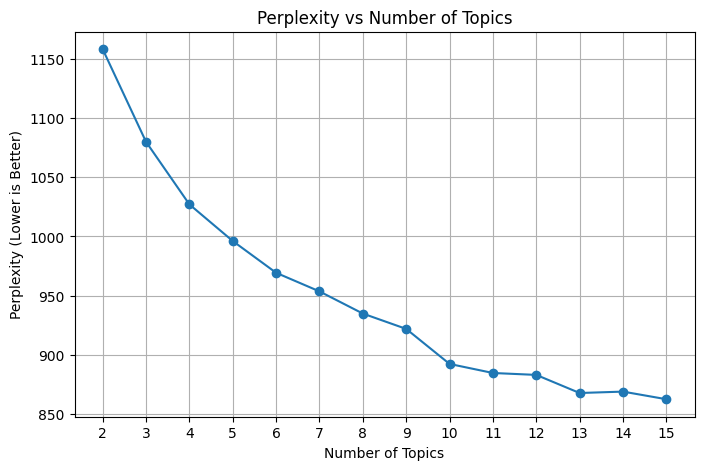

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 16)  # 토픽 개수 2개 ~ 15개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.1, 
        max_iter=10,  # 충분한 학습 횟수
        learning_method='batch',  # 안정적인 batch 학습
        random_state=42,
        n_jobs=-1  # 병렬 처리
    )
    lda.fit(dtm)
    perplexities.append(lda.perplexity(dtm))  # perplexity 저장

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.xticks(topic_range)
plt.grid()
plt.show()


In [170]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import pprint

# 1. LDA 모델 학습 (n_components=9로 설정)
lda = LatentDirichletAllocation(
    n_components=5, 
    doc_topic_prior=0.1, 
    random_state=42
)
lda.fit(dtm)

# 2. 토픽별 주요 키워드 출력
topic_names = [f'토픽 {i}' for i in range(1, 6)] 

terms = vectorizer.get_feature_names_out()
topic_keywords = {}

for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:][::-1]]  # 상위 10개 키워드 (역순 정렬)
    topic_keywords[topic_names[i]] = top_keywords

# 3. 기사별 주요 토픽 점수 출력 (DataFrame 활용)
doc_topic = lda.transform(dtm)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
    }
    result.update({topic_names[j]: round(topic_dist[j], 4) for j in range(len(topic_names))})  # 소수점 4자리 반올림
    results.append(result)

df_results = pd.DataFrame(results)

# 4. 결과 출력
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)



[토픽별 주요 키워드]
{'토픽 1': ['검단', '보호', '헷지', '하는', '파크', '아테', '자산', '통해', '신도시', '푸르지오'],
 '토픽 2': ['건설', '평택', '이다', '시티', '사업', '하는', '계약', '경기', '용인', '반도체'],
 '토픽 3': ['미분', '했다', '경쟁률', '당첨', '주택', '평균', '가점', '이다', '올해', '시장'],
 '토픽 4': ['이다', '예정', '호선', '된다', '면적', '지구', '있는', '건설', '수도권', '했다'],
 '토픽 5': ['했다', '이다', '가격', '억원', '주택', '상승', '만원', '억만원', '거래', '하는']}


In [172]:
import pandas as pd

# 기사별 주요 토픽 점수 출력
doc_topic = lda.transform(dtm)

# 토픽 이름 설정
topic_names = [f'토픽 {i}' for i in range(1, 6)] 

# 기사별 토픽 비율 정리 (테이블 형식)
topic_df = pd.DataFrame(doc_topic, columns=topic_names)
topic_df.insert(0, '기사 번호', range(1, len(topic_df) + 1))

# 주요 토픽 추가
topic_df['주요 토픽'] = topic_df[topic_names].idxmax(axis=1)

# 결과 출력 (테이블 형식)
topic_df.head(20)


,기사 번호,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,주요 토픽
0,1,0.000810,0.000810,0.670319,0.094074,0.233987,토픽 3
1,2,0.000985,0.000985,0.996058,0.000986,0.000986,토픽 3
2,3,0.000639,0.000639,0.997443,0.000639,0.000639,토픽 3
3,4,0.052899,0.500428,0.107452,0.000551,0.338670,토픽 2
4,5,0.113778,0.000830,0.000830,0.883732,0.000830,토픽 4
5,6,0.027864,0.000635,0.000635,0.970231,0.000635,토픽 4
6,7,0.110682,0.039650,0.001361,0.846946,0.001361,토픽 4
7,8,0.205285,0.079366,0.001212,0.712925,0.001212,토픽 4
8,9,0.036370,0.000619,0.000619,0.961772,0.000619,토픽 4
9,10,0.022673,0.000573,0.000573,0.975608,0.000573,토픽 4


<Axes: xlabel='count', ylabel='주요 토픽'>

/opt/anaconda3/envs/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/venv/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/venv/lib/py

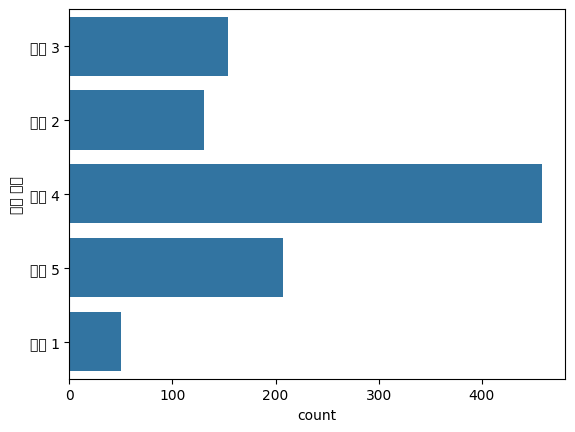

In [173]:
import seaborn as sns

sns.countplot(topic_df['주요 토픽'])

## 기사 전체 다 넣어서 Topic modeling

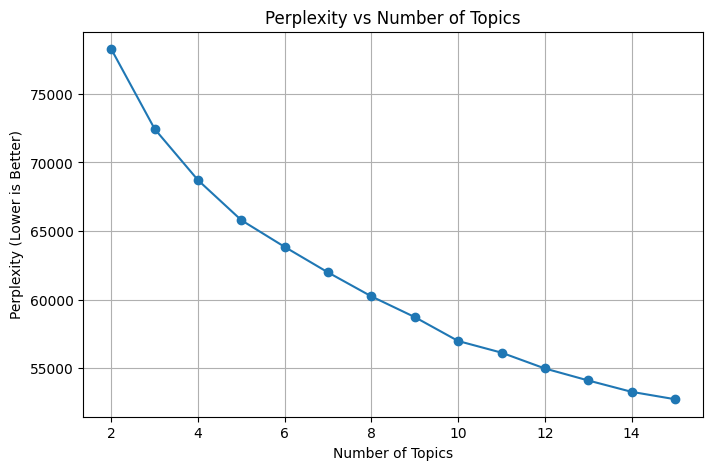

In [9]:
# 최적 토픽 개수 설정
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# 1. 벡터화 (CountVectorizer)
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    ngram_range=(1, 2), # unigram + bigram 사용
    stop_words=['에서', '그리고', '하지만', '때문에', '지난', '있다', '하는', '했다', '수']
)

# 코퍼스 생성
corpus_total = df['content'].tolist()
dtm_total = vectorizer.fit_transform(corpus_total)

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 16) # 토픽 개수 2개 ~ 15개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.1, 
        random_state=42
    )
    lda.fit(dtm_total)
    perplexities.append(lda.perplexity(dtm_total))

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.grid()
plt.show()

In [10]:
# 전처리해야함!!!!